In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
%matplotlib inline

In [2]:
#reading dataset
hep_df=pd.read_csv("hepatitis_csv.csv")

In [3]:
hep_df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [4]:
#to get an idea about datatypes and missing values
hep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [5]:
hep_df.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

<AxesSubplot:>

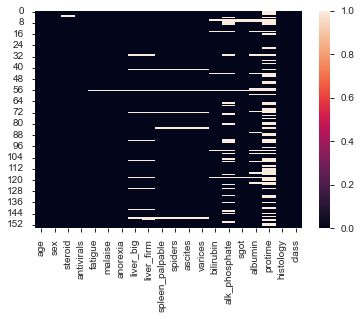

In [6]:
# **to check missing values**
sns.heatmap(hep_df.isnull())

In [7]:

desc=hep_df.describe().transpose()
desc


,count,mean,std,min,25%,50%,75%,max
age,155.0,41.200000,12.565878,7.0,32.00,39.0,50.00,78.0
bilirubin,149.0,1.427517,1.212149,0.3,0.70,1.0,1.50,8.0
alk_phosphate,126.0,105.325397,51.508109,26.0,74.25,85.0,132.25,295.0
sgot,151.0,85.894040,89.650890,14.0,31.50,58.0,100.50,648.0
albumin,139.0,3.817266,0.651523,2.1,3.40,4.0,4.20,6.4
protime,88.0,61.852273,22.875244,0.0,46.00,61.0,76.25,100.0


## Replacing  Missing values 

In [8]:
hep_df["steroid"].fillna(hep_df["steroid"].mode()[0], inplace = True) 

In [9]:
hep_df["fatigue"].fillna(hep_df["fatigue"].mode()[0], inplace = True) 

In [10]:
hep_df["malaise"].fillna(hep_df["malaise"].mode()[0], inplace = True) 

In [11]:
hep_df["anorexia"].fillna(hep_df["anorexia"].mode()[0], inplace = True) 

F:\anaconda_inst\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='steroid', ylabel='count'>

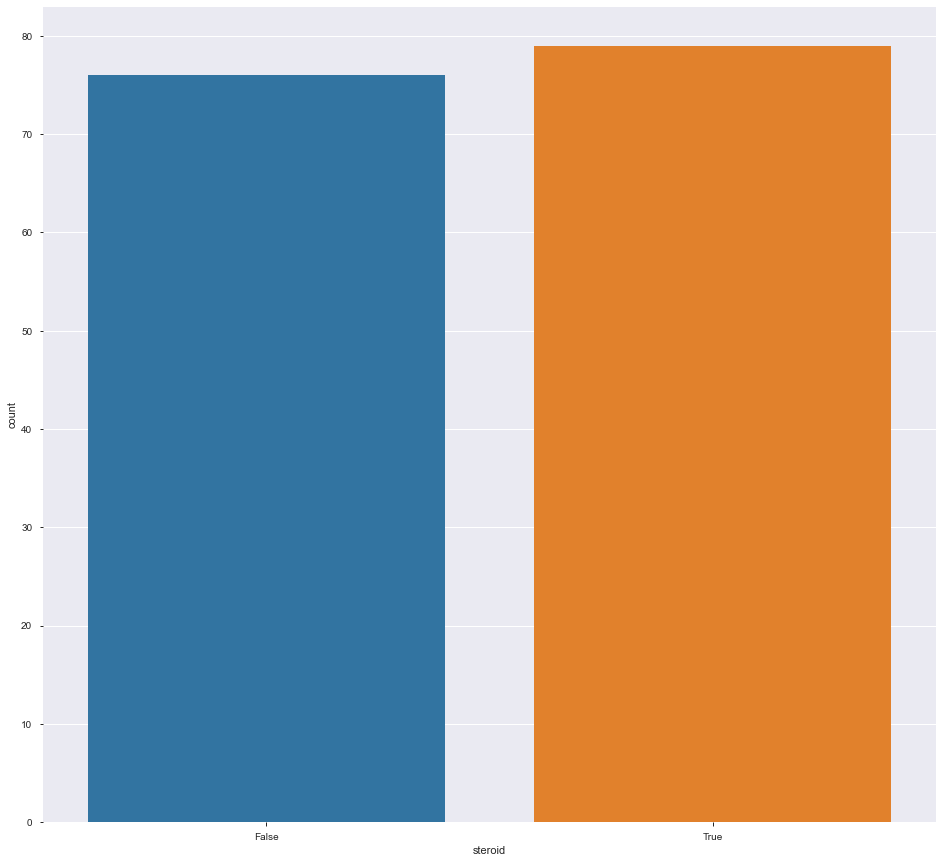

In [12]:
#data is balanced here
plt.figure(figsize = (16,15))

sns.countplot(hep_df["steroid"])

F:\anaconda_inst\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='count'>

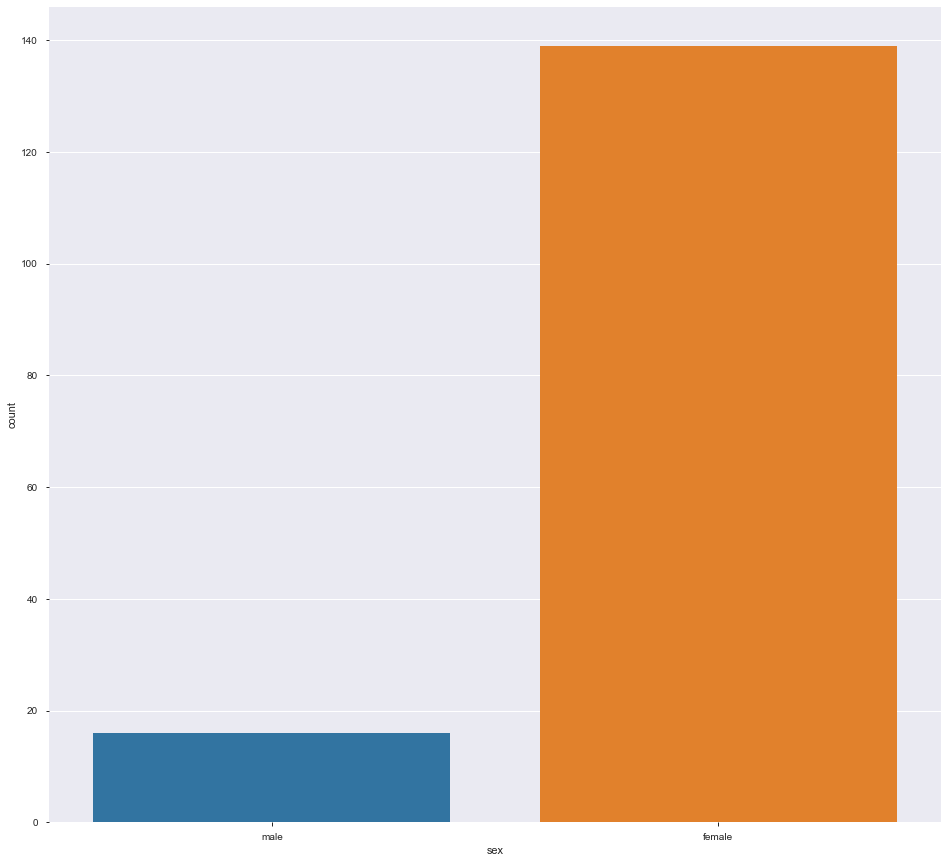

In [13]:
# as per the analysis dataset is occupied with Female
plt.figure(figsize = (16,15))
sns.countplot(hep_df["sex"])

<AxesSubplot:>

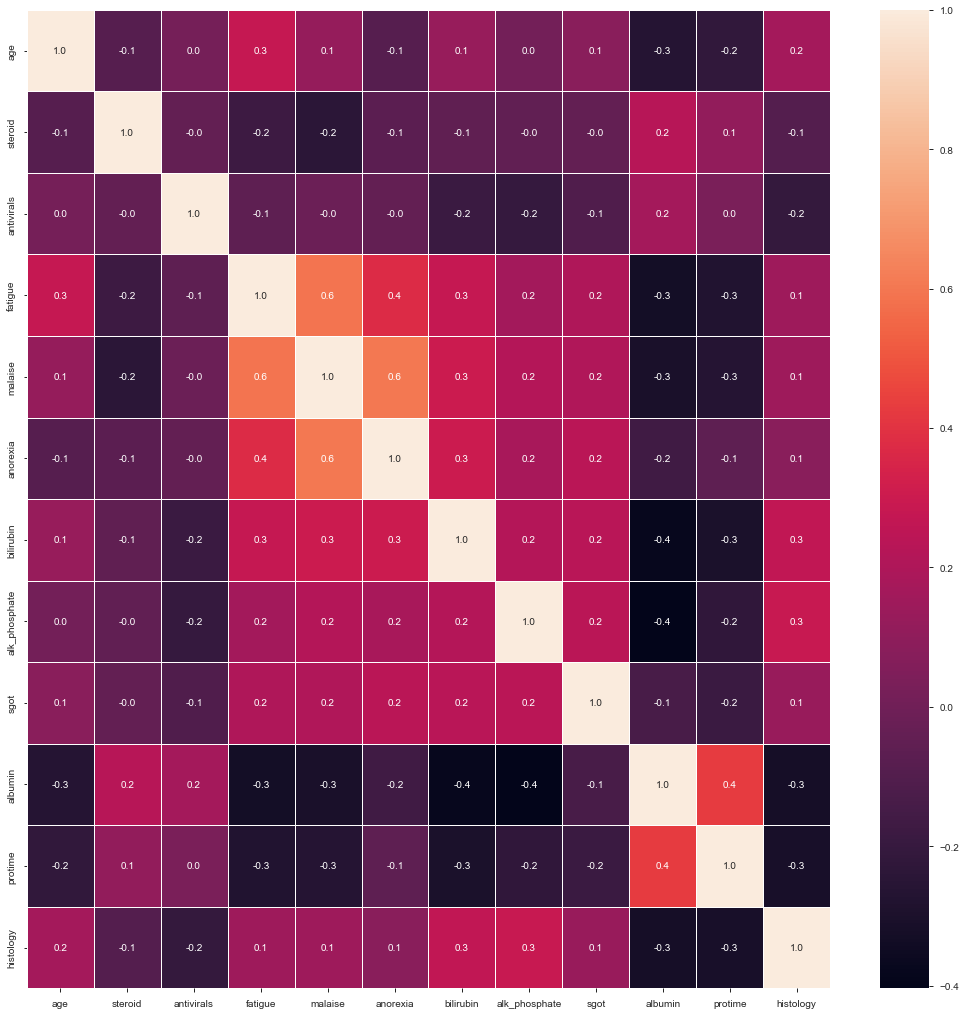

In [14]:
#corelation plot usefull in dropping features while model traiing 
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(hep_df.corr(method="pearson"),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)

In [15]:
hep_df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,True,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [16]:

hep_df["liver_big"].fillna(hep_df["liver_big"].mode()[0], inplace = True) 

F:\anaconda_inst\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='liver_big', ylabel='count'>

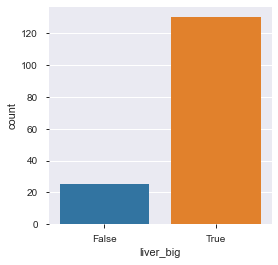

In [17]:
plt.figure(figsize = (4,4))

sns.countplot(hep_df["liver_big"])

In [18]:
hep_df["liver_firm"].fillna(hep_df["liver_firm"].mode()[0], inplace = True) 

F:\anaconda_inst\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='liver_firm', ylabel='count'>

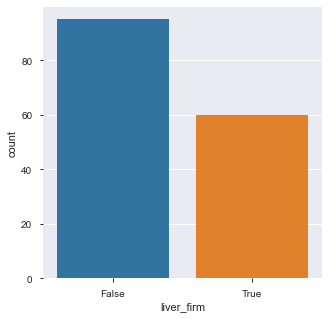

In [19]:
plt.figure(figsize = (5,5))

sns.countplot(hep_df["liver_firm"])

In [20]:

hep_df["spleen_palpable"].fillna(hep_df["spleen_palpable"].mode()[0], inplace = True) 

In [21]:

hep_df["spiders"].fillna(hep_df["spiders"].mode()[0], inplace = True) 

In [22]:

hep_df["ascites"].fillna(hep_df["ascites"].mode()[0], inplace = True) 

In [23]:
hep_df["varices"].fillna(hep_df["varices"].mode()[0], inplace = True)

In [24]:
hep_df["alk_phosphate"].median()

85.0

In [25]:
hep_df["alk_phosphate"].mean()

105.32539682539682

<AxesSubplot:ylabel='alk_phosphate'>

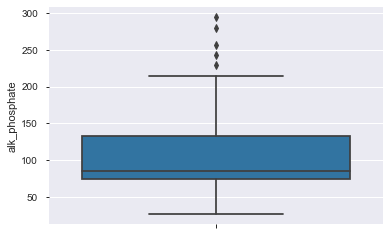

In [26]:
#box plot to check outlier
sns.boxplot( y=hep_df["alk_phosphate"])


In [27]:
hep_df["alk_phosphate"].fillna(hep_df["alk_phosphate"].median(), inplace = True)

In [28]:

hep_df["sgot"]

0       18.0
1       42.0
2       32.0
3       52.0
4      200.0
       ...  
150    242.0
151    142.0
152     20.0
153     19.0
154     19.0
Name: sgot, Length: 155, dtype: float64

<AxesSubplot:ylabel='sgot'>

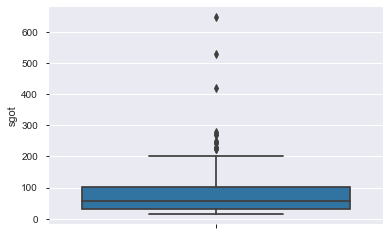

In [29]:
sns.boxplot( y=hep_df["sgot"])

In [30]:
hep_df["sgot"].fillna(hep_df["sgot"].median(), inplace = True)

<AxesSubplot:ylabel='albumin'>

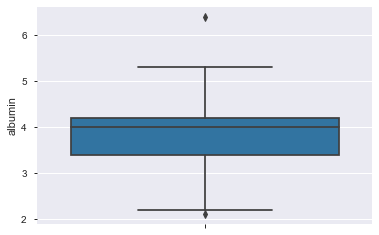

In [31]:
sns.boxplot( y=hep_df["albumin"])

In [32]:
hep_df["albumin"].fillna(hep_df["albumin"].median(), inplace = True)

<AxesSubplot:ylabel='protime'>

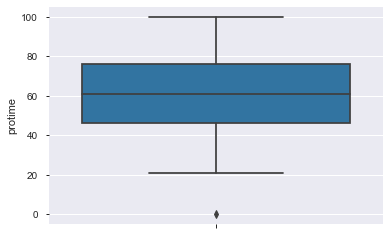

In [33]:

sns.boxplot( y=hep_df["protime"])

<AxesSubplot:ylabel='protime'>

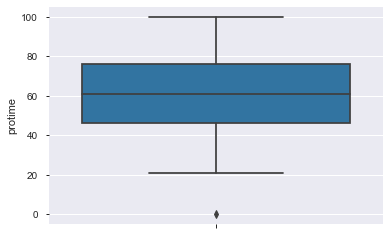

In [34]:
sns.boxplot( y=hep_df["protime"])

## as there are more outling treating outiers 


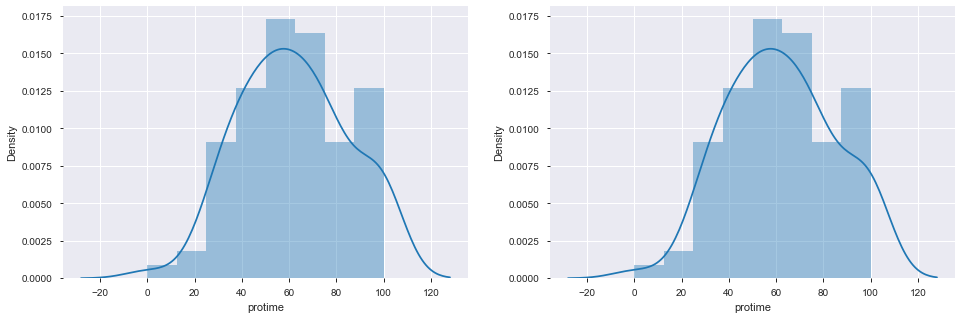

In [35]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(hep_df["protime"])
plt.subplot(1,2,2)
sns.distplot(hep_df["protime"])
plt.show()


In [36]:
print("Highest allowed",hep_df["protime"].mean() + 3*hep_df["protime"].std())
print("Lowest allowed",hep_df["protime"].mean() - 3*hep_df["protime"].std())

Highest allowed 130.47800396170706
Lowest allowed -6.773458507161614
